# Final Project

### Q1. Your views about the problem statement?

The Daily Buzz, a small newspaper in Sydney, was founded by journalists and entrepreneurs who aimed to provide accurate and trustworthy news to the community. They created a new column called "The Weather Oracle" to provide accurate predictions for the coming days. The editor-in-chief hired a team of experienced meteorologists equipped with state-of-the-art technology and weather forecasting tools to work on the column. The column, which included detailed predictions for the week ahead, was a hit with readers. As the popularity of the column continued to grow, the editor-in-chief hired a machine learning expert to create a model for accurately predicting the rainfall in Sydney.

My task is to try various methods and find the one with the best accuracy for predicting the rainfall in Sydney.

Below are the data provided based on which the prediction needs to be done:
* Date:The date of observation
* Location:The common name of the location of the weather station
* MinTemp:The minimum temperature in degrees celsius
* MaxTemp:The maximum temperature in degrees celsius
* Rainfall:The amount of rainfall recorded for the day in mm
* Evaporation:The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine:The number of hours of bright sunshine in the day
* Humidity 9am:Humidity (percent) at 9am
* Humidity3pm:Humidity (percent) at 3pm
* Pressure 9am:Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure 3pm:Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud 9 Am:Fraction of sky obscured by cloud at 9am.
* Cloud3pm:Fraction of sky obscured by clouds (in "oktas": eighths) at 3pm.
* Temp 9am:Temperature (degrees C) at 9am
* Temp3pm:Temperature (degrees C) at 3pm
* RainToday:Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow:Boolean: next day rain

### Q2. What will be your approach to solving this task?

My approach to solving this task is as below:
* Import the necessary libraries
* Import the data
* Do the pre-processing on the data (drop any column with single value, missing value treatment and outliers treatment)
* Mention the dependent and independent variables
* Check the correlation between the dependent and independent variables and drop the column which is not correlated to the dependent variable.
* Update the independent variables
* Visualize the data
* Split the data for Train and Test
* Train and test available models
* Based on the model's performance conclude which model is best suited


### Q3. What were the available ML model options you had to perform this task?

The following are the ML model options available for performing this task:

* Classification and Regression Trees
* K-Nearest Neighbors (KNN)
* Bagging
* Random Forest
* Grid Search
* Gradient Boosting
* Ada Boost
* Logistic Regression 



### Q4. Which model’s performance is best and what could be the possible reason for that?

In this model the accuracy score of Grid Search using XG Boost estimator is high 0.8308383233532934.

### Q5. What steps can you take to improve this selected model’s performance even further?


To improve the selected model's performance, will train and test with more random samples.


## 1. Import the necessary libraries

In [1]:
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sb
import xgboost as xgb
import matplotlib.pyplot as plt
import statsmodels.api as sma
import statsmodels.discrete.discrete_model as smd

from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


## 2. Load the data from the excel file

In [2]:
mlfp_df = pd.read_excel("sydney_rain prediction.xlsx", header=0)

## 3. Print the details of the data
* Number of rows and columns
* First five rows
* EDD
* Information about the variables

In [3]:
mlfp_df.shape

(3337, 17)

From the output pf the dataframe.shape command, we see that there are 3337 rows and 17 columns present in the data.

And below is the output of the command dataframe.head(), which displays the first five rows of the data.

In [4]:
mlfp_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

Below command dataframe.describe returns the below details:

If the DataFrame contains numerical data, the description contains these information for each column:
* count - The number of not-empty values.
* mean - The average (mean) value.
* std - The standard deviation.
* min - the minimum value.
* 25% - The 25% percentile.
* 50% - The 50% percentile.(Median)
* 75% - The 75% percentile.
* max - the maximum value.

In [5]:
mlfp_df.describe()

Date      MinTemp      MaxTemp     Rainfall  \
count                           3337  3334.000000  3335.000000  3331.000000   
mean   2012-10-16 01:24:34.737788672    14.865057    23.002339     3.330231   
min              2008-02-01 00:00:00     4.300000    11.700000     0.000000   
25%              2010-05-15 00:00:00    11.000000    19.600000     0.000000   
50%              2012-09-28 00:00:00    14.900000    22.800000     0.000000   
75%              2015-03-14 00:00:00    18.700000    26.000000     1.400000   
max              2017-06-25 00:00:00    27.600000    45.800000   119.400000   
std                              NaN     4.553641     4.494638     9.895172   

       Evaporation     Sunshine  Humidity9am  Humidity3pm  Pressure9am  \
count  3286.000000  3321.000000  3323.000000  3324.000000  3317.000000   
mean      5.187432     7.179374    68.229010    54.699158  1018.346156   
min       0.000000     0.000000    19.000000    10.000000   986.700000   
25%       3.200000     4.300000    58.000000    44.000000  1013.700000   
50%       4.800000     8.300000    69.000000    56.000000  1018.600000   
75%       7.000000    10.200000    80.000000    65.000000  1023.100000   
max      18.400000    13.600000   100.000000    99.000000  1039.000000   
std       2.777407     3.810886    15.085355    16.293530     7.021571   

       Pressure3pm     Cloud9am     Cloud3pm      Temp9am      Temp3pm  
count  3318.000000  2771.000000  2776.000000  3333.000000  3333.000000  
mean   1016.018774     4.181523     4.218660    17.819742    21.533333  
min     989.800000     0.000000     0.000000     6.400000    10.200000  
25%    1011.300000     1.000000     1.000000    13.800000    18.400000  
50%    1016.300000     5.000000     4.000000    18.200000    21.300000  
75%    1020.800000     7.000000     7.000000    21.700000    24.500000  
max    1036.700000     9.000000     8.000000    36.500000    44.700000  
std       7.032211     2.749578     2.641885     4.897177     4.303737

dataframe.info() method returns the information about each column like:
- Name of the column
- Count of non-null values
- Data type of the column

In [6]:
mlfp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

## Dropping the columns with single value

Below code checks the length of a column's unique value lists.
If it is equal to 1, then it will drop the column.

In [7]:
for col_name in mlfp_df.columns:
    if len(mlfp_df[col_name].unique()) == 1:
        print("The column [", col_name, "] has a single value", mlfp_df[col_name].unique(), ". So, dropping this column.")
        del mlfp_df[col_name]

The column [ Location ] has a single value ['Sydney'] . So, dropping this column.


**Below code converts Yes and No to 1 and 0 for the columns RainToday and RainTomorrow** 

In [8]:
for name in ["RainToday", "RainTomorrow"]:
    for item in mlfp_df[name]:
        if item == 'Yes':
            mlfp_df[name].replace(item,1,inplace=True)
        elif item == 'No':
            mlfp_df[name].replace(item,0,inplace=True)

In [9]:
mlfp_df.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0 2008-02-01     19.5     22.4      15.6          6.2       0.0         92.0   
1 2008-02-02     19.5     25.6       6.0          3.4       2.7         83.0   
2 2008-02-03     21.6     24.5       6.6          2.4       0.1         88.0   
3 2008-02-04     20.2     22.8      18.8          2.2       0.0         83.0   
4 2008-02-05     19.7     25.7      77.4          NaN       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday  RainTomorrow  
0     20.9        1.0             1  
1     24.8        1.0             1  
2     23.0        1.0             1  
3     20.9        1.0             1  
4     25.5        1.0             1

In [10]:
mlfp_df.corr()

Date   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Date          1.000000  0.067472  0.117589  0.026729     0.079268  0.023476   
MinTemp       0.067472  1.000000  0.770893  0.012883     0.571257 -0.063154   
MaxTemp       0.117589  0.770893  1.000000 -0.140107     0.513138  0.326683   
Rainfall      0.026729  0.012883 -0.140107  1.000000    -0.126143 -0.308044   
Evaporation   0.079268  0.571257  0.513138 -0.126143     1.000000  0.177628   
Sunshine      0.023476 -0.063154  0.326683 -0.308044     0.177628  1.000000   
Humidity9am  -0.109267  0.052490 -0.187437  0.331045    -0.399019 -0.490967   
Humidity3pm  -0.076616  0.271686 -0.152615  0.301681    -0.103246 -0.585736   
Pressure9am   0.018121 -0.393827 -0.389088 -0.037051    -0.349421 -0.046654   
Pressure3pm   0.012257 -0.356406 -0.425169  0.003216    -0.303330 -0.094841   
Cloud9am      0.025409  0.260508 -0.095859  0.277427    -0.041160 -0.734302   
Cloud3pm     -0.003765  0.180094 -0.108426  0.229576    -0.041205 -0.751838   
Temp9am       0.082103  0.939116  0.859346 -0.056061     0.608872  0.115135   
Temp3pm       0.098005  0.752922  0.960457 -0.143698     0.477629  0.345139   
RainToday    -0.003763  0.018909 -0.188070  0.555191    -0.232571 -0.367554   
RainTomorrow -0.003207  0.079975 -0.149285  0.294121    -0.065221 -0.523060   

              Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Date            -0.109267    -0.076616     0.018121     0.012257  0.025409   
MinTemp          0.052490     0.271686    -0.393827    -0.356406  0.260508   
MaxTemp         -0.187437    -0.152615    -0.389088    -0.425169 -0.095859   
Rainfall         0.331045     0.301681    -0.037051     0.003216  0.277427   
Evaporation     -0.399019    -0.103246    -0.349421    -0.303330 -0.041160   
Sunshine        -0.490967    -0.585736    -0.046654    -0.094841 -0.734302   
Humidity9am      1.000000     0.659194     0.263977     0.252360  0.459455   
Humidity3pm      0.659194     1.000000     0.154908     0.183647  0.498119   
Pressure9am      0.263977     0.154908     1.000000     0.963173 -0.012196   
Pressure3pm      0.252360     0.183647     0.963173     1.000000  0.020884   
Cloud9am         0.459455     0.498119    -0.012196     0.020884  1.000000   
Cloud3pm         0.359910     0.517755    -0.044233    -0.003187  0.609556   
Temp9am         -0.148239     0.128818    -0.419440    -0.405047  0.097135   
Temp3pm         -0.157598    -0.214047    -0.346731    -0.392653 -0.098202   
RainToday        0.401028     0.343336    -0.000357     0.056993  0.349366   
RainTomorrow     0.329501     0.472105    -0.032536     0.011004  0.364861   

              Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  
Date         -0.003765  0.082103  0.098005  -0.003763     -0.003207  
MinTemp       0.180094  0.939116  0.752922   0.018909      0.079975  
MaxTemp      -0.108426  0.859346  0.960457  -0.188070     -0.149285  
Rainfall      0.229576 -0.056061 -0.143698   0.555191      0.294121  
Evaporation  -0.041205  0.608872  0.477629  -0.232571     -0.065221  
Sunshine     -0.751838  0.115135  0.345139  -0.367554     -0.523060  
Humidity9am   0.359910 -0.148239 -0.157598   0.401028      0.329501  
Humidity3pm   0.517755  0.128818 -0.214047   0.343336      0.472105  
Pressure9am  -0.044233 -0.419440 -0.346731  -0.000357     -0.032536  
Pressure3pm  -0.003187 -0.405047 -0.392653   0.056993      0.011004  
Cloud9am      0.609556  0.097135 -0.098202   0.349366      0.364861  
Cloud3pm      1.000000  0.074174 -0.159852   0.287597      0.456955  
Temp9am       0.074174  1.000000  0.829095  -0.074634     -0.000721  
Temp3pm      -0.159852  0.829095  1.000000  -0.188926     -0.188991  
RainToday     0.287597 -0.074634 -0.188926   1.000000      0.341547  
RainTomorrow  0.456955 -0.000721 -0.188991   0.341547      1.000000

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


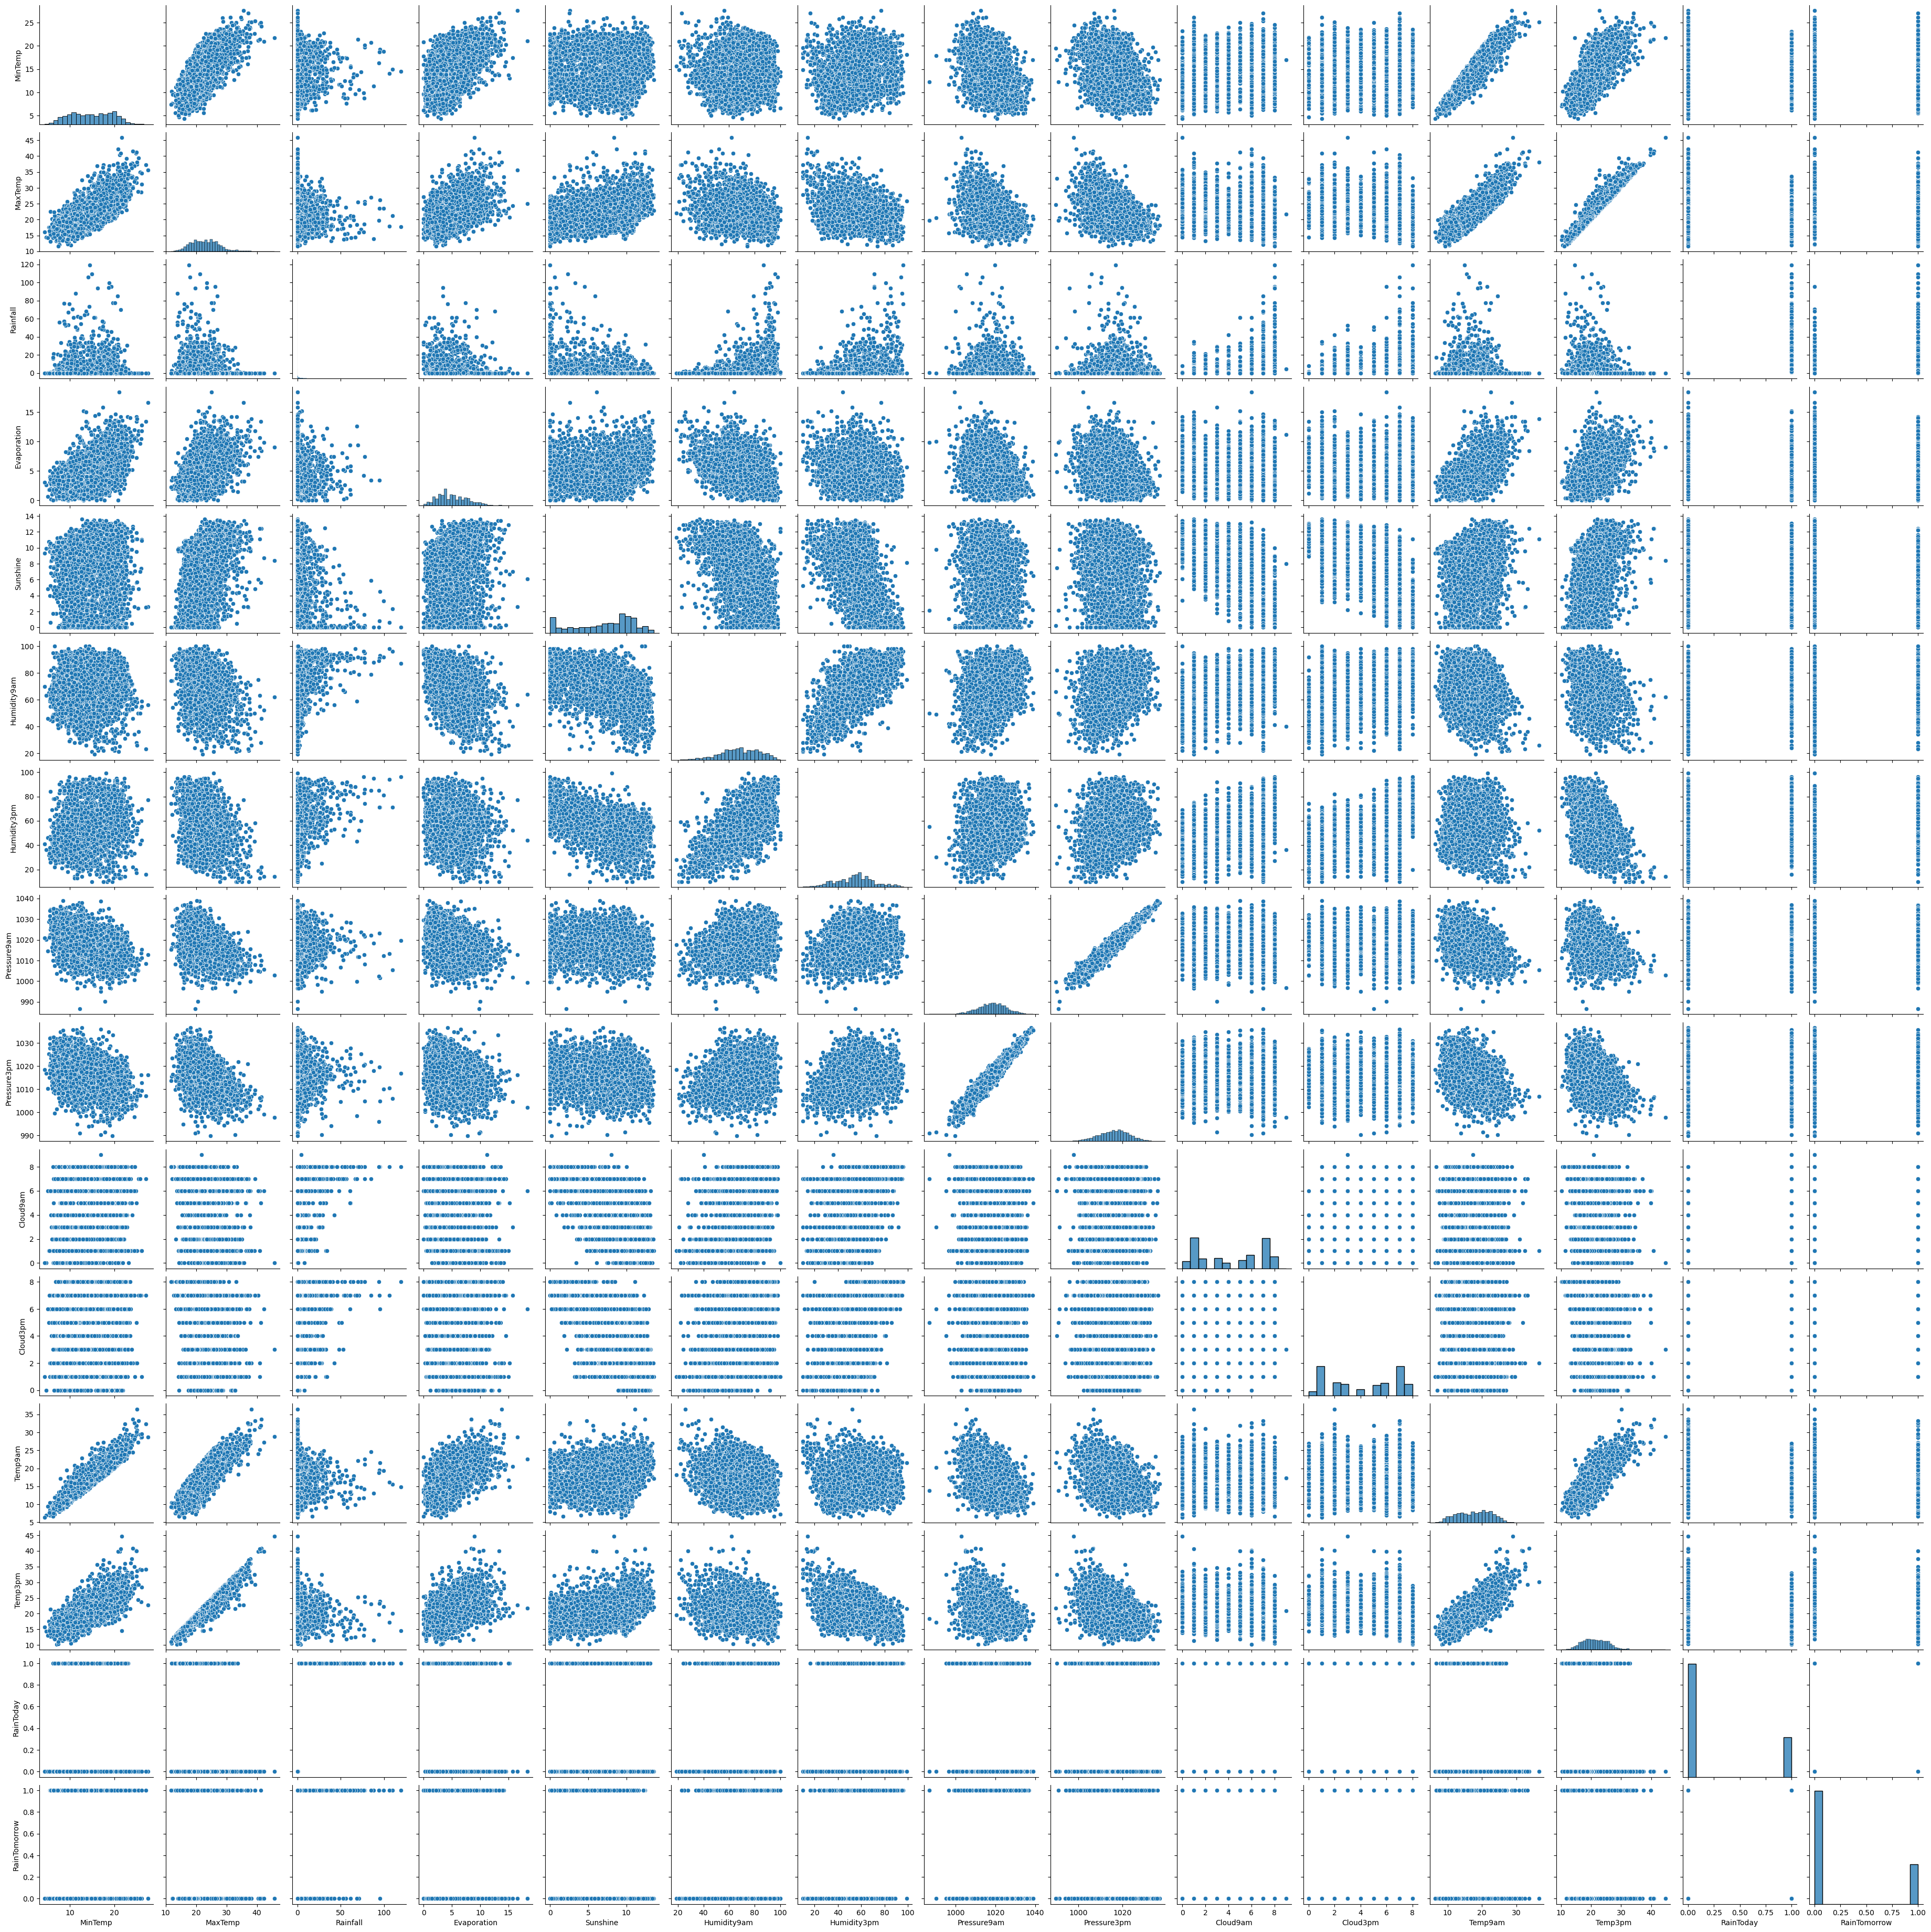

In [11]:
sb.pairplot(mlfp_df)

### Correlation between the variables

Since the correlation value is very less for the date column, dropping the this column.
Also, the correlation between "Temp9am", "Temp3pm", "MinTemp", and "MaxTemp" are high, dropping "Temp9am" and "Temp3pm".

In [12]:
del mlfp_df['Date']
del mlfp_df['Temp9am']
del mlfp_df['Temp3pm']

## Missing Values Imputation

Below code checks whether any particular column has missing values or not.
If there is any missing value, then the missing values are filled with the mean value of that column.

In [13]:
mlfp_df.fillna(value = mlfp_df.mean(), inplace = True)

In [14]:
mlfp_df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.551593     4.493290     9.886270     2.756095     3.801737   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.200000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.053668    16.261752     7.000492     7.012157     2.505491   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.800000  1011.300000     2.000000   
50%      69.000000    56.000000  1018.500000  1016.300000     4.181523   
75%      80.000000    64.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm    RainToday  RainTomorrow  
count  3337.000000  3337.000000   3337.000000  
mean      4.218660     0.259982      0.259215  
std       2.409531     0.438296      0.438269  
min       0.000000     0.000000      0.000000  
25%       2.000000     0.000000      0.000000  
50%       4.218660     0.000000      0.000000  
75%       7.000000     1.000000      1.000000  
max       8.000000     1.000000      1.000000

In [15]:
mlfp_df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6     6.200000       0.0         92.0   
1     19.5     25.6       6.0     3.400000       2.7         83.0   
2     21.6     24.5       6.6     2.400000       0.1         88.0   
3     20.2     22.8      18.8     2.200000       0.0         83.0   
4     19.7     25.7      77.4     5.187432       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  RainToday  \
0         84.0       1017.6       1017.4       8.0       8.0        1.0   
1         73.0       1017.9       1016.4       7.0       7.0        1.0   
2         86.0       1016.7       1015.6       7.0       8.0        1.0   
3         90.0       1014.2       1011.8       8.0       8.0        1.0   
4         74.0       1008.3       1004.8       8.0       8.0        1.0   

   RainTomorrow  
0             1  
1             1  
2             1  
3             1  
4             1

## Outliers Treatment

* Below code checks the values that are greater than 3*(**99th percentile**) and replaces it with 3*(99th percentile)
* And also checks the values that are lesser than 0.3*(**1st percentile**) and replaces it with 0.3*(1st percentile)

In [16]:
for col_name in mlfp_df.columns:
    upper = np.percentile(mlfp_df[[col_name]], 99, method='midpoint')
    lower = np.percentile(mlfp_df[[col_name]], 1, method='midpoint')
    upper_array = np.where( mlfp_df[col_name] > 3*upper)[0]
    print("Upper Bound:", upper, col_name)
    print(upper_array)
    mlfp_df.loc[ mlfp_df[col_name] > 3*upper, col_name] = 3*upper
    lower_array = np.where( mlfp_df[col_name] < 0.3*lower)[0]
    print("Lower Bound:", lower, col_name)
    print(lower_array)
    mlfp_df.loc[ mlfp_df[col_name] < 0.3* lower, col_name] = 0.3*lower


Upper Bound: 23.5 MinTemp
[]
Lower Bound: 6.2 MinTemp
[]
Upper Bound: 35.5 MaxTemp
[]
Lower Bound: 14.4 MaxTemp
[]
Upper Bound: 52.099999999999994 Rainfall
[]
Lower Bound: 0.0 Rainfall
[]
Upper Bound: 12.8 Evaporation
[]
Lower Bound: 0.4 Evaporation
[ 219  489  888 2627 2738 2799 3193]
Upper Bound: 13.0 Sunshine
[]
Lower Bound: 0.0 Sunshine
[]
Upper Bound: 96.0 Humidity9am
[]
Lower Bound: 30.0 Humidity9am
[]
Upper Bound: 92.0 Humidity3pm
[]
Lower Bound: 18.0 Humidity3pm
[]
Upper Bound: 1033.8 Pressure9am
[]
Lower Bound: 1001.6 Pressure9am
[]
Upper Bound: 1031.65 Pressure3pm
[]
Lower Bound: 999.0 Pressure3pm
[]
Upper Bound: 8.0 Cloud9am
[]
Lower Bound: 0.0 Cloud9am
[]
Upper Bound: 8.0 Cloud3pm
[]
Lower Bound: 0.0 Cloud3pm
[]
Upper Bound: 1.0 RainToday
[]
Lower Bound: 0.0 RainToday
[]
Upper Bound: 1.0 RainTomorrow
[]
Lower Bound: 0.0 RainTomorrow
[]


In [18]:
mlfp_df.shape

(3337, 13)

In [19]:
mlfp_df.head(220)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0       19.5     22.4      15.6     6.200000       0.0         92.0   
1       19.5     25.6       6.0     3.400000       2.7         83.0   
2       21.6     24.5       6.6     2.400000       0.1         88.0   
3       20.2     22.8      18.8     2.200000       0.0         83.0   
4       19.7     25.7      77.4     5.187432       0.0         88.0   
..       ...      ...       ...          ...       ...          ...   
215      9.7     17.9       0.0     3.400000       6.2         67.0   
216     13.5     17.1       0.4     4.600000       0.7         55.0   
217     13.1     15.7       1.6     4.400000       0.0         76.0   
218     11.8     14.2      62.2     5.187432       0.0         92.0   
219      9.5     19.0      21.6     0.120000       9.4         69.0   

     Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  RainToday  \
0           84.0       1017.6       1017.4       8.0       8.0        1.0   
1           73.0       1017.9       1016.4       7.0       7.0        1.0   
2           86.0       1016.7       1015.6       7.0       8.0        1.0   
3           90.0       1014.2       1011.8       8.0       8.0        1.0   
4           74.0       1008.3       1004.8       8.0       8.0        1.0   
..           ...          ...          ...       ...       ...        ...   
215         64.0       1032.6       1032.4       7.0       7.0        0.0   
216         64.0       1034.2       1031.0       7.0       8.0        0.0   
217         88.0       1024.9       1020.8       8.0       8.0        1.0   
218         88.0       1014.8       1013.1       8.0       8.0        1.0   
219         51.0       1016.4       1014.1       2.0       6.0        1.0   

     RainTomorrow  
0               1  
1               1  
2               1  
3               1  
4               1  
..            ...  
215             0  
216             1  
217             1  
218             1  
219             0  

[220 rows x 13 columns]

## X and Y split

Split the dependent and independent variables.
Here "RainTomorrow" is the dependent variable and the remaining columns are independent variables.

In [20]:
X = mlfp_df.drop(columns=["RainTomorrow"], axis=1)
type(X)

pandas.core.frame.DataFrame

In [21]:
X.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6     6.200000       0.0         92.0   
1     19.5     25.6       6.0     3.400000       2.7         83.0   
2     21.6     24.5       6.6     2.400000       0.1         88.0   
3     20.2     22.8      18.8     2.200000       0.0         83.0   
4     19.7     25.7      77.4     5.187432       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  RainToday  
0         84.0       1017.6       1017.4       8.0       8.0        1.0  
1         73.0       1017.9       1016.4       7.0       7.0        1.0  
2         86.0       1016.7       1015.6       7.0       8.0        1.0  
3         90.0       1014.2       1011.8       8.0       8.0        1.0  
4         74.0       1008.3       1004.8       8.0       8.0        1.0

In [22]:
X.shape

(3337, 12)

In [23]:
y = mlfp_df["RainTomorrow"]
type(y)

pandas.core.series.Series

In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow, dtype: int64

In [25]:
y.shape

(3337,)

### Test-Train Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10)

In [27]:
X_train.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
2507     19.6     28.9       0.2          3.0      10.5         72.0   
775      15.6     26.0       0.0          5.4      11.3         80.0   
3015      8.7     19.7       0.0          2.6      10.8         75.0   
110      11.1     18.9       0.0          2.4       6.1         74.0   
1525     10.8     23.3       0.0          1.2      10.2         68.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  RainToday  
2507         54.0       1011.5       1010.5  2.000000   1.00000        0.0  
775          54.0       1025.7       1024.5  0.000000   1.00000        0.0  
3015         52.0       1026.4       1022.9  1.000000   1.00000        0.0  
110          64.0       1022.4       1022.8  4.000000   7.00000        0.0  
1525         37.0       1018.7       1016.5  4.181523   4.21866        0.0

In [28]:
X_train.shape

(2669, 12)

In [29]:
X_test.shape

(668, 12)

### Training Classification Tree

In [30]:
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [31]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Predict values using trained model

In [32]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [33]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

### Model Performance

In [34]:
confusion_matrix(y_train, y_train_pred)

array([[1951,   41],
       [ 416,  261]], dtype=int64)

In [35]:
confusion_matrix(y_test, y_test_pred)

array([[471,   9],
       [124,  64]], dtype=int64)

In [36]:
clftree_score =accuracy_score(y_test, y_test_pred)

In [37]:
acc_score_dict = {"CLF": clftree_score, }
print(clftree_score)

0.8008982035928144


### Plotting decision tree

In [38]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

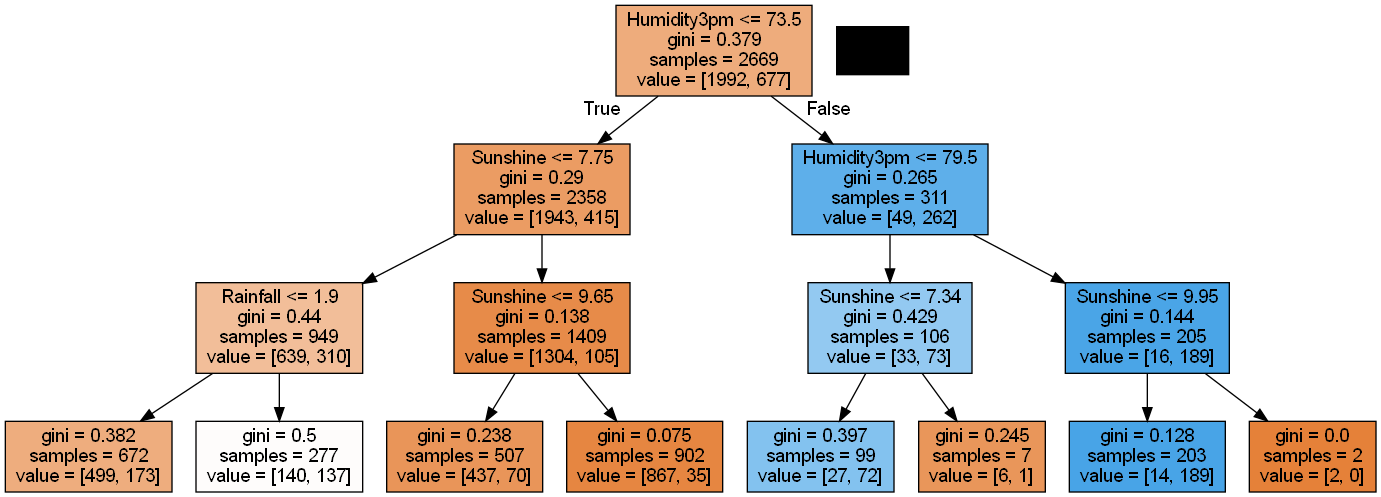

In [39]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [40]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

## Controlling Tree growth

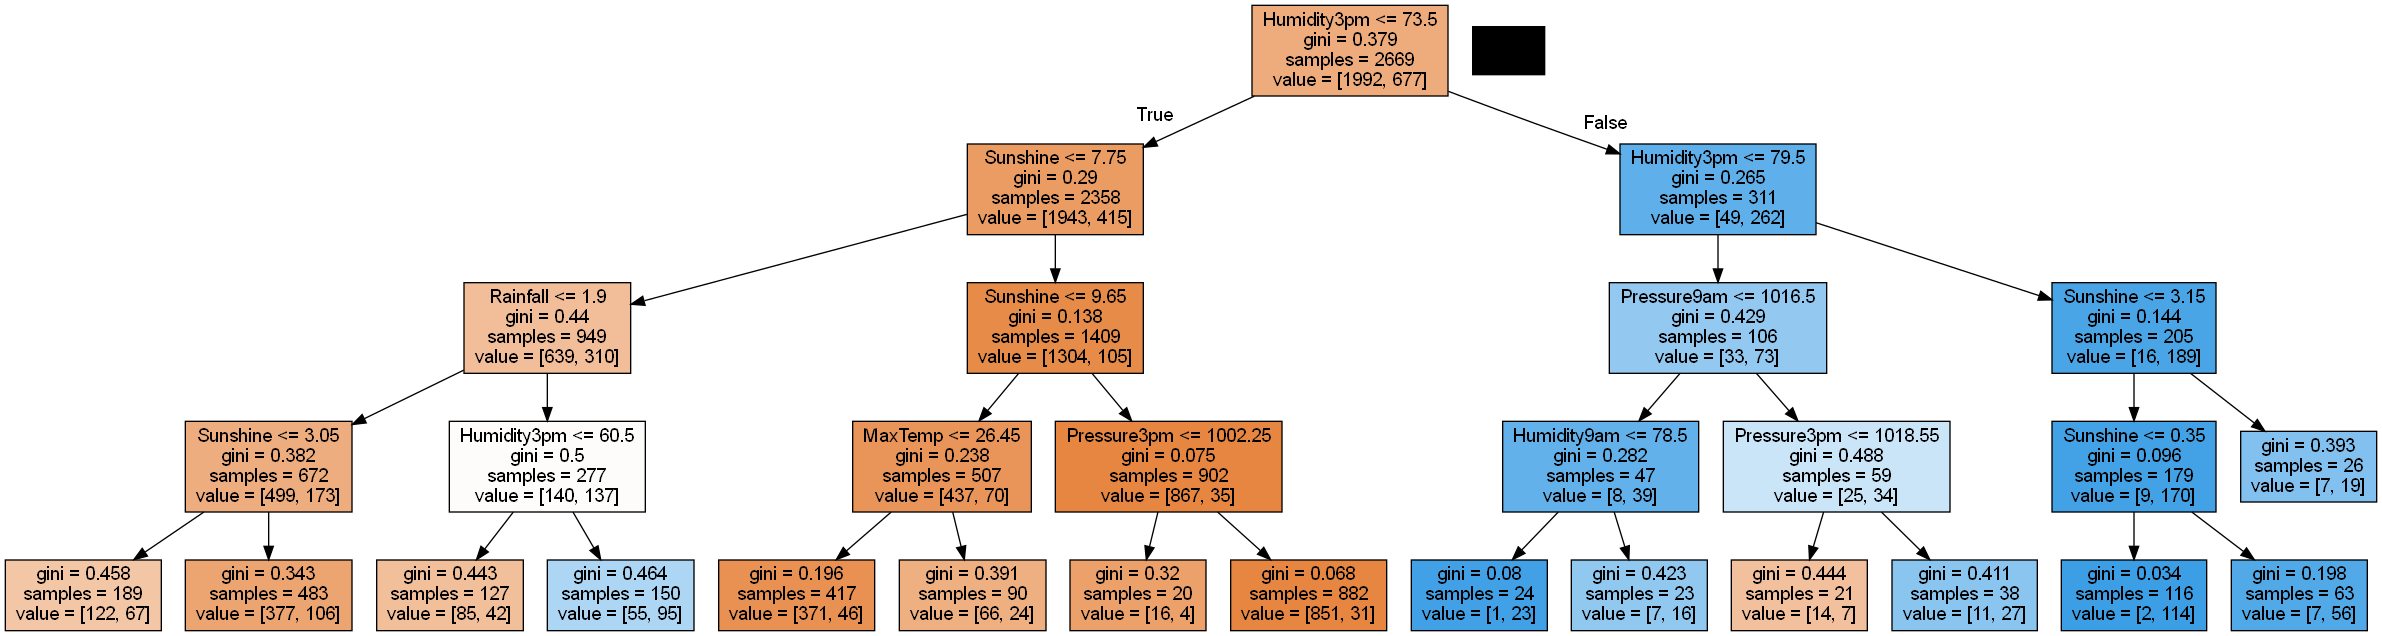

In [41]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [42]:
clftree2_score = accuracy_score(y_test, clftree2.predict(X_test))
acc_score_dict["CLF2"] = clftree2_score
print(clftree2_score)

0.8143712574850299


## Linear Discriminant Analysis

In [43]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X, y)

LinearDiscriminantAnalysis()

In [44]:
y_pred_lda = clf_lda.predict(X) 

In [45]:
y_pred_lda

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
confusion_matrix(y, y_pred_lda)

array([[2267,  205],
       [ 361,  504]], dtype=int64)

### Performance metrics
* Precision
$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$
* Recall
$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$
* AUC (ROC) 

In [47]:
precision_score(y, y_pred_lda)

0.7108603667136812

In [48]:
recall_score(y, y_pred_lda)

0.5826589595375723

In [49]:
clf_lda_score = roc_auc_score(y, y_pred_lda)
acc_score_dict["LDA"] = clf_lda_score
print(clf_lda_score)

0.7498650784742878


## K-Nearest Neighbors

In [50]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train)

In [51]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s= scaler.transform(X_test)

In [52]:
X_test_s

array([[ 0.60902743, -0.64609147,  1.37956531, ...,  1.56277231,
         1.57881637,  1.64612261],
       [ 0.1407874 , -0.47006758, -0.35312362, ...,  1.16283169,
         1.16166183, -0.60837746],
       [ 1.35395474,  0.9161206 , -0.29600201, ...,  0.36295045,
        -0.50695635, -0.60837746],
       ...,
       [-0.22103444, -1.13015719, -0.01039394, ...,  1.16283169,
         1.16166183,  1.64612261],
       [ 1.01341654,  0.76209969, -0.35312362, ..., -1.23681203,
        -1.34126543, -0.60837746],
       [-0.96596175, -0.75610641, -0.33408308, ..., -1.63675265,
        -1.34126543, -0.60837746]])

In [53]:
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
confusion_matrix(y_test, clf_knn_1.predict(X_test_s))

array([[426,  54],
       [ 87, 101]], dtype=int64)

In [55]:
knn1_score = accuracy_score(y_test, clf_knn_1.predict(X_test_s))
acc_score_dict["KNN1"] = knn1_score
print(knn1_score)

0.7889221556886228


In [56]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_s, y_train)
knn3_score = accuracy_score(y_test, clf_knn_3.predict(X_test_s))
acc_score_dict["KNN3"] = knn3_score
print(knn3_score)

0.7994011976047904


In [57]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,30]}

In [58]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [59]:
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                         30]})

In [60]:
grid_search_cv.best_params_

{'n_neighbors': 30}

In [61]:
optimised_KNN = grid_search_cv.best_estimator_

In [62]:
y_test_pred = optimised_KNN.predict(X_test_s) 

In [63]:
confusion_matrix(y_test, y_test_pred)

array([[457,  23],
       [104,  84]], dtype=int64)

In [64]:
knn3_grid_score = accuracy_score(y_test, y_test_pred)
acc_score_dict["KNN3_grid"] = knn3_grid_score
print(knn3_grid_score)

0.8098802395209581


## Logistic Regression

In [65]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_test_pred = clf_LR.predict(X_test)

In [67]:
confusion_matrix(y_test, y_test_pred)

array([[449,  31],
       [ 87, 101]], dtype=int64)

In [68]:
LR_score = accuracy_score(y_test, y_test_pred)
acc_score_dict["LogReg"] = LR_score
print(LR_score)

0.8233532934131736


In [69]:
clf_LR.fit(X,y)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
clf_LR.intercept_

array([0.00049557])

In [71]:
clf_LR.coef_

array([[-0.05254071,  0.0411839 ,  0.03885285,  0.02671736, -0.22751737,
         0.00601835,  0.04206688, -0.05760195,  0.05418368, -0.0340589 ,
         0.16277068,  0.03940113]])

In [72]:
X_cons = sma.add_constant(X)

In [73]:
logit = smd.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.382634
         Iterations 7


In [74]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3324
Method:                           MLE   Df Model:                           12
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.3313
Time:                        00:48:38   Log-Likelihood:                -1276.9
converged:                       True   LL-Null:                       -1909.5
Covariance Type:            nonrobust   LLR p-value:                1.428e-263
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          30.6391      8.453      3.625      0.000      14.072      47.207
MinTemp        -0.1438      0.029     -4.994      0.000      -0.200      -0.087
MaxTemp         0.1078      0.028      3.899      0.000       0.054       0.162
Rainfall        0.0108      0.007      1.657      0.098      -0.002       0.024
Evaporation     0.0586      0.025      2.312      0.021       0.009       0.108
Sunshine       -0.2217      0.022     -9.895      0.000      -0.266      -0.178
Humidity9am     0.0025      0.005      0.479      0.632      -0.008       0.013
Humidity3pm     0.0578      0.005     10.649      0.000       0.047       0.068
Pressure9am    -0.1170      0.030     -3.963      0.000      -0.175      -0.059
Pressure3pm     0.0828      0.029      2.881      0.004       0.026       0.139
Cloud9am       -0.0837      0.030     -2.766      0.006      -0.143      -0.024
Cloud3pm        0.1554      0.032      4.927      0.000       0.094       0.217
RainToday       0.7440      0.136      5.473      0.000       0.478       1.010
===============================================================================
"""

### Predicting and confusion matrix

In [75]:
clf_LR.predict_proba(X)

array([[0.08807572, 0.91192428],
       [0.33403779, 0.66596221],
       [0.13147408, 0.86852592],
       ...,
       [0.61743217, 0.38256783],
       [0.96910608, 0.03089392],
       [0.96747974, 0.03252026]])

In [76]:
y_pred = clf_LR.predict(X)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [77]:
confusion_matrix(y, y_pred)

array([[2271,  201],
       [ 381,  484]], dtype=int64)

In [78]:
LR1_score = accuracy_score(y, y_pred)
acc_score_dict["LogReg1"] = LR1_score
print(LR1_score)

0.8255918489661372


In [80]:
y_pred_03 = (clf_LR.predict_proba(X)[:,1] >= 0.3)

In [81]:
y_pred_03

array([ True,  True,  True, ...,  True, False, False])

In [82]:
confusion_matrix(y, y_pred_03)

array([[2046,  426],
       [ 248,  617]], dtype=int64)

In [83]:
LR2_score = accuracy_score(y, y_pred_03)
acc_score_dict["LogReg2"] = LR2_score
print(LR2_score)

0.7980221756068325


### Bagging


In [84]:
clftree = tree.DecisionTreeClassifier()

In [85]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=10)

In [86]:
bag_clf.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=10)

In [87]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[454,  26],
       [ 92,  96]], dtype=int64)

In [88]:
bag_score = accuracy_score(y_test, bag_clf.predict(X_test))
acc_score_dict["Bagging"] = bag_score
print(bag_score)

0.8233532934131736


### Random Forest

In [89]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=10)

In [90]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=10)

In [91]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[455,  25],
       [ 92,  96]], dtype=int64)

In [92]:
rf_score = accuracy_score(y_test, rf_clf.predict(X_test))
acc_score_dict["RandForest"] = rf_score
print(rf_score)

0.8248502994011976


### Grid Search

In [93]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=10)

In [94]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [95]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [96]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [97]:
grid_search.best_params_ 

{'max_features': 4, 'min_samples_split': 10}

In [98]:
cvrf_clf = grid_search.best_estimator_

In [99]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[453,  27],
       [ 93,  95]], dtype=int64)

In [100]:
grid_rf_score = accuracy_score(y_test, cvrf_clf.predict(X_test))
acc_score_dict["Grid_RandForest"] = grid_rf_score
print(grid_rf_score)

0.8203592814371258


### Gradient Boosting

In [101]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [102]:
gbc1_score = accuracy_score(y_test, gbc_clf.predict(X_test))
acc_score_dict["GBC1"] = gbc1_score
print(gbc1_score)

0.8158682634730539


In [103]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [104]:
confusion_matrix(y_test, gbc_clf2.predict(X_test))

array([[459,  21],
       [100,  88]], dtype=int64)

In [105]:
gbc2_score = accuracy_score(y_test, gbc_clf2.predict(X_test))
acc_score_dict["GBC2"] = gbc2_score
print(gbc2_score)

0.8188622754491018


### Ada Boost

In [106]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [107]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [108]:
confusion_matrix(y_test, ada_clf.predict(X_test))

array([[451,  29],
       [ 98,  90]], dtype=int64)

In [109]:
ada1_score = accuracy_score(y_test, ada_clf.predict(X_test))
acc_score_dict["ADA1"] = ada1_score
print(ada1_score)

0.8098802395209581


In [110]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)

In [111]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=250,
                                                    random_state=10),
                   learning_rate=0.05, n_estimators=500)

In [112]:
confusion_matrix(y_test, ada_clf2.predict(X_test))

array([[452,  28],
       [ 96,  92]], dtype=int64)

In [113]:
ada2_rf_score = accuracy_score(y_test, ada_clf2.predict(X_test))
acc_score_dict["ADA2_RF"] = ada2_rf_score
print(ada2_rf_score)

0.8143712574850299


### XG Boost

In [114]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [115]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [116]:
confusion_matrix(y_test, xgb_clf.predict(X_test))

array([[437,  43],
       [ 84, 104]], dtype=int64)

In [117]:
xgb_score = accuracy_score(y_test, xgb_clf.predict(X_test))
acc_score_dict["XGB"] = xgb_score
print(xgb_score)

0.8098802395209581


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

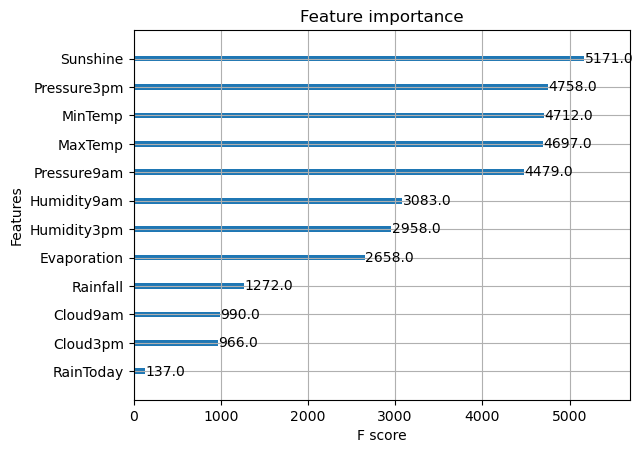

In [118]:
xgb.plot_importance(xgb_clf)

In [119]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=10)

In [120]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [121]:
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs=-1, cv=5, scoring='accuracy')

In [122]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=10, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [123]:
cvxg_clf = grid_search.best_estimator_

In [124]:
grid_xgb_score = accuracy_score(y_test, cvxg_clf.predict(X_test))
acc_score_dict["Grid_XGB"] = grid_xgb_score
print(grid_xgb_score)

0.8308383233532934


In [125]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 9,
 'reg_alpha': 1,
 'subsample': 0.9}

### Printing all the accuracy score values

In [126]:
dic_keys = list(acc_score_dict.keys())
dic_values = list(acc_score_dict.values())
sorted_value_index = np.argsort(dic_values)
sorted_dict = {dic_keys[i]: dic_values[i] for i in sorted_value_index}

In [127]:
print(sorted_dict)

{'LDA': 0.7498650784742878, 'KNN1': 0.7889221556886228, 'LogReg2': 0.7980221756068325, 'KNN3': 0.7994011976047904, 'CLF': 0.8008982035928144, 'KNN3_grid': 0.8098802395209581, 'XGB': 0.8098802395209581, 'ADA1': 0.8098802395209581, 'ADA2_RF': 0.8143712574850299, 'CLF2': 0.8143712574850299, 'GBC1': 0.8158682634730539, 'GBC2': 0.8188622754491018, 'Grid_RandForest': 0.8203592814371258, 'LogReg': 0.8233532934131736, 'Bagging': 0.8233532934131736, 'RandForest': 0.8248502994011976, 'LogReg1': 0.8255918489661372, 'Grid_XGB': 0.8308383233532934}


In [128]:
print("The accuracy score of Classification tree is:", clftree_score)
print("The accuracy score of Classification tree with min_sample_leaf and max_depth parameters set:", clftree2_score)
print("The accuracy score of LDA is:", clf_lda_score)
print("The accuracy score of KNN with number of neighbours equal to 1 is:", knn1_score)
print("The accuracy score of KNN with number of neighbours equal to 3 is:", knn3_score)
print("The accuracy score of KNN with grid search is:", knn3_grid_score)
print("The accuracy score of Logistic Regression is:", LR_score)
print("The accuracy score of Logistic Regression by adding constant to X is:", LR1_score)
print("The accuracy score of Logistic Regression by using parabolic prediction is:", LR2_score)
print("The accuracy score of Bagging Classifier is:", bag_score)
print("The accuracy score of Random Forest Classifier is:", rf_score)
print("The accuracy score of Grid Search using random forest estimator is:", grid_rf_score)
print("The accuracy score of Gradient Boost Classifier is:", gbc1_score)
print("The accuracy score of Gradient Boost Classifier with 1000 estimators is:", gbc2_score)
print("The accuracy score of XG Boost Classifier is:", xgb_score)
print("The accuracy score of Grid Search using XG Boost estimator is:", grid_xgb_score)
print("The accuracy score of ADA Boost Classifier is:", ada1_score)
print("The accuracy score of ADA Boost using random forest estimator is:", ada2_rf_score)
print("The accuracy score of XG Boost Classifier is:", xgb_score)
print("The accuracy score of Grid Search using XG Boost estimator is:", grid_xgb_score)

The accuracy score of Classification tree is: 0.8008982035928144
The accuracy score of Classification tree with min_sample_leaf and max_depth parameters set: 0.8143712574850299
The accuracy score of LDA is: 0.7498650784742878
The accuracy score of KNN with number of neighbours equal to 1 is: 0.7889221556886228
The accuracy score of KNN with number of neighbours equal to 3 is: 0.7994011976047904
The accuracy score of KNN with grid search is: 0.8098802395209581
The accuracy score of Logistic Regression is: 0.8233532934131736
The accuracy score of Logistic Regression by adding constant to X is: 0.8255918489661372
The accuracy score of Logistic Regression by using parabolic prediction is: 0.7980221756068325
The accuracy score of Bagging Classifier is: 0.8233532934131736
The accuracy score of Random Forest Classifier is: 0.8248502994011976
The accuracy score of Grid Search using random forest estimator is: 0.8203592814371258
The accuracy score of Gradient Boost Classifier is: 0.815868263473